In [1]:
%load_ext autoreload
%autoreload 2

import pyVHR as vhr
import numpy as np
from pyVHR.analysis.pipeline import Pipeline
from pyVHR.plot.visualize import *
import os
import plotly.express as px
from pyVHR.utils.errors import getErrors, printErrors, displayErrors

import constants
import pandas as pd

vhr.plot.VisualizeParams.renderer = 'vscode' 

# PURE

1min, FPS 30 Hz, 640 x 480 pixels

Pulse rate 60 Hz

- Steady - Talking - Slow Translation - Fast Translatoin - Small Rotation - Medium Rotation

In [2]:
import json 

filename = 'D:/datasets_rppg/PURE/01-01/01-01.json'
bvp = []

with open(filename) as json_file:
    json_data = json.load(json_file)
    for p in json_data['/FullPackage']:
        bvp.append(p['Value']['waveform'])
bvp = np.array(bvp)

In [3]:
# load npy file
data = np.load('D:/datasets_rppg/PURE/PURE_npy_all/RGB_01-01.npy', allow_pickle=True)
size = int(np.sqrt(data.shape[-1]))

print(f"NPY data of shape {data.shape}: 1 min video of {data.shape[0]} frames is {data.shape[0]/60} fps") 
print(f"Total number of pixels is {data.shape[-1]}, height and width is {np.sqrt(data.shape[-1])}")
print(f"Then {size} squared is {size*size} pixels")

NPY data of shape (455, 3, 2026): 1 min video of 455 frames is 7.583333333333333 fps
Total number of pixels is 2026, height and width is 45.0111097397076
Then 45 squared is 2025 pixels


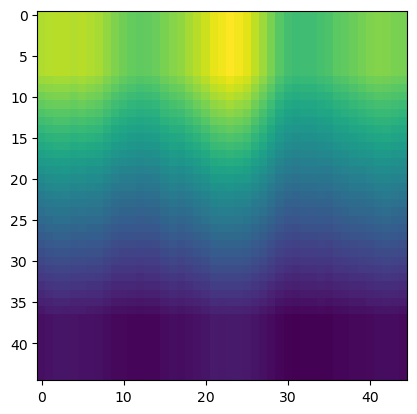

In [4]:
import cv2

img = data[390]
img = cv2.resize(img, (size, size))
plt.imshow(img)

In [6]:
# -- LOAD A DATASET

dataset_name = 'PURE'    
video_DIR, BVP_DIR = 'D:/datasets_rppg/PURE/', 'D:/datasets_rppg/PURE/'

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames

# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

D:/datasets_rppg/PURE/


TypeError: 'NoneType' object is not subscriptable

# LGI-PPGI

reference

In [32]:
# -- LOAD A DATASET

dataset_name = 'lgi_ppgi'    
video_DIR, BVP_DIR = constants.get_dataset_paths(dataset_name)

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames

# -- PARAMETER SETTING

wsize = 8        # seconds of video processed (with overlapping) for each estimate 
video_idx = 1    # index of the video to be processed
fname = dataset.getSigFilename(video_idx)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(wsize)
videoFileName = dataset.getVideoFilename(video_idx)
print('Video processed name: ', videoFileName)
fps = vhr.extraction.get_fps(videoFileName)
print('Video frame rate:     ',fps)

last bvp time 4557 75950
last vid time 74055
diff 1.895
Diff samples 114
Video processed name:  D:/datasets_rppg/lgi_ppgi\alex\alex_resting\cv_camera_sensor_stream_handler.avi
Video frame rate:      25.0


# MR NIRP

- Pulse oximeter measurements (same as LGI-PPGI)
- The raw 10-bit images were recorded with 640 × 640 resolution at 30 fps. -> avi is 25 though
- We used a CMS 50D+ finger pulse oximeter to obtain a  round-truth PPG waveform recorded at 60 fps

In [5]:
import scipy.io
path = 'D:/datasets_rppg/MR-NIRP_indoor/Subject1_motion_940/Subject1_motion_940/PulseOX/'
data = scipy.io.loadmat(path+'pulseOx.mat')
print(data.keys())
print(data['pulseOxRecord'].shape, data['pulseOxTime'].shape)
print(f"{data['pulseOxRecord'].shape[-1]} frames with 60 fps so {data['pulseOxRecord'].shape[-1]/60} seconds")
pd.DataFrame([data])

dict_keys(['__header__', '__version__', '__globals__', 'pulseOxRecord', 'pulseOxTime', 'numPulseSample'])
(1, 3910) (1, 3910)
3910 frames with 60 fps so 65.16666666666667 seconds


,__header__,__version__,__globals__,pulseOxRecord,pulseOxTime,numPulseSample
0,"b'MATLAB 5.0 MAT-file Platform: posix, Created...",1.0,[],"[[[[43]], [[43]], [[44]], [[44]], [[43]], [[42...","[[1519076918.648566, 1519076918.665297, 151907...",[[3910]]


In [6]:
# load npy file: is this maybe the video NPY?
data = np.load(path+'pulseOx.npy', allow_pickle=True)
size = int(np.sqrt(data.shape[-1]))
print("Size: ", data.shape)
print(f"There are 1965 pictures in the picture folder with 30 fps so {1965 / 30}s of video makes sense")

print(f"Maybe this is the NPY of the video with {data.shape[-1]} frames")
print(f"If video fps is 30, then the video is {data.shape[-1]/30} seconds long")
print(f"If video fps is 25, then the video is {data.shape[-1]/25} seconds long")
print(f"But this does not make sense, 1800 should be the image pixels and 467 the frames")

Size:  (1, 467, 3, 1800)
There are 1965 pictures in the picture folder with 30 fps so 65.5s of video makes sense
Maybe this is the NPY of the video with 1800 frames
If video fps is 30, then the video is 60.0 seconds long
If video fps is 25, then the video is 72.0 seconds long
But this does not make sense, 1800 should be the image pixels and 467 the frames


In [56]:
# -- LOAD A DATASET

path =  'D:/datasets_rppg/MR-NIRP_indoor/' 
dataset_name = 'MR_NIRP'    
video_DIR, BVP_DIR = path, path

dataset = vhr.datasets.datasetFactory(dataset_name, videodataDIR=video_DIR, BVPdataDIR=BVP_DIR)
allvideo = dataset.videoFilenames

# print the list of video names with the progressive index (idx)
for v in range(len(allvideo)):
  print(v, allvideo[v])

0 D:/datasets_rppg/MR-NIRP_indoor/Subject1_motion_940\Subject1_motion_940\RGB_corrected\Subject1_motion_940.avi
1 D:/datasets_rppg/MR-NIRP_indoor/Subject1_still_940-015\Subject1_still_940\RGB_corrected\Subject1_still_940.avi
2 D:/datasets_rppg/MR-NIRP_indoor/Subject2_motion_940\Subject2_motion_940\RGB_corrected\Subject2_motion_940.avi
3 D:/datasets_rppg/MR-NIRP_indoor/Subject2_still_940-002\Subject2_still_940\RGB_corrected\Subject2_still_940.avi
4 D:/datasets_rppg/MR-NIRP_indoor/Subject3_motion_940\Subject3_motion_940\RGB_corrected\Subject3_motion_940.avi
5 D:/datasets_rppg/MR-NIRP_indoor/Subject3_still_940-012\Subject3_still_940\RGB_corrected\Subject3_still_940.avi
6 D:/datasets_rppg/MR-NIRP_indoor/Subject4_motion_940\Subject4_motion_940\RGB_corrected\Subject4_motion_940.avi
7 D:/datasets_rppg/MR-NIRP_indoor/Subject4_still_940-004\Subject4_still_940\RGB_corrected\Subject4_still_940.avi
8 D:/datasets_rppg/MR-NIRP_indoor/Subject5_still_940-003\Subject5_still_940\RGB_corrected\Subject5_s

In [58]:
# -- PARAMETER SETTING

wsize = 8        # seconds of video processed (with overlapping) for each estimate 
video_idx = 1    # index of the video to be processed
fname = dataset.getSigFilename(video_idx)
sigGT = dataset.readSigfile(fname)
bpmGT, timesGT = sigGT.getBPM(wsize)
videoFileName = dataset.getVideoFilename(video_idx)
print('Video processed name: ', videoFileName)
fps = vhr.extraction.get_fps(videoFileName)
print('Video frame rate:     ',fps)

Video processed name:  D:/datasets_rppg/MR-NIRP_indoor/Subject1_still_940-015\Subject1_still_940\RGB_corrected\Subject1_still_940.avi
Video frame rate:      30.0


Fname :  D:/datasets_rppg/MR-NIRP_indoor/Subject1_motion_940\Subject1_motion_940\PulseOX\pulseOx.mat
Video processed name:  D:/datasets_rppg/MR-NIRP_indoor/Subject1_motion_940\Subject1_motion_940\RGB_corrected\Subject1_motion_940.avi
Video frame rate:      30.0


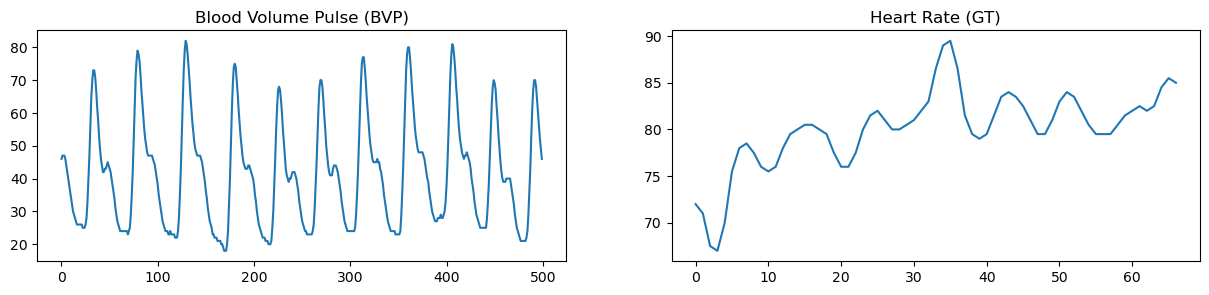

In [61]:
# -- PARAMETER SETTING

wsize = 8          # seconds of video processed (with overlapping) for each estimate 
video_idx = 0      # index of the video to be processed
fname = dataset.getSigFilename(video_idx)
sigGT = dataset.readSigfile(fname)
print("Fname : ", fname)

test_bvp = sigGT.data
bpmGT, timesGT = sigGT.getBPM(wsize) # STFT 42-240 BPM
videoFileName = dataset.getVideoFilename(video_idx)
print('Video processed name: ', videoFileName)
fps = vhr.extraction.get_fps(videoFileName)
print('Video frame rate:     ',fps)

fig, ax = plt.subplots(1,2,figsize=(15,3))
ax[0].plot(sigGT.data.T[500:1000])
ax[0].set_title('Blood Volume Pulse (BVP)')
ax[1].plot(timesGT, bpmGT)
ax[1].set_title('Heart Rate (GT)')
plt.show()